# Spam message detection using Naive Bayes



To filter mobile phone spam using the Naive Bayes algorithm


https://github.com/stedy/Machine-Learning-with-R-datasets

In [39]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import string
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
import statsmodels.api as sm

# {{{The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency
# weightings, and allow you to encode new documents. Alternately, if you already have a learned
# CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document 
# frequencies and start encoding documents.}}}

In [9]:
data = pd.read_csv('spamsms-1.csv',encoding='latin-1')
data

,type,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
data.drop(columns=[ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
data

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data.type.value_counts()

ham     4825
spam     747
Name: type, dtype: int64

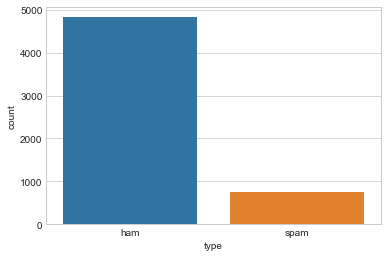

In [12]:
# data[data.type == 'ham'].valuescount
sns.countplot(x=data.type, data= data)

In [13]:
print(data.drop('type',axis=1))

                                                   text
0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
...                                                 ...
5567  This is the 2nd time we have tried 2 contact u...
5568              Will Ì_ b going to esplanade fr home?
5569  Pity, * was in mood for that. So...any other s...
5570  The guy did some bitching but I acted like i'd...
5571                         Rofl. Its true to its name

[5572 rows x 1 columns]


In [14]:
#splitting document into words and tokenizing it. 
def text_process(x):
    return x.split()

bow_transformer = CountVectorizer(analyzer=text_process).fit(data['text'])
print(len(bow_transformer.vocabulary_))

#bow_transformer here seems to develop a vocabulary 
#of all the used words by tokenizing them. 

15585


In [16]:
print(bow_transformer.get_feature_names()[0])
print(bow_transformer.get_feature_names()[8555])

!
february


In [19]:
data['length'] = data['text'].apply(lambda x:len(x))
data = data[data['length']>0]
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
 2   length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 174.1+ KB


,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
X = data['text']
y = data['type']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [26]:
x_train

4393    Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
216      Tired. I haven't slept well the past few nights.
4471      3. You have received your mobile content. Enjoy
3889    Double Mins & 1000 txts on Orange tariffs. Lat...
5030     Hey... Very inconvenient for your sis a not huh?
                              ...                        
905     Hey what's up charles sorry about the late reply.
5192    Oh oh... Den muz change plan liao... Go back h...
3980    Huh i cant thk of more oredi how many pages do...
235     I have printed it oh. So  &lt;#&gt;  come upst...
5157                              K k:) sms chat with me.
Name: text, Length: 3900, dtype: object

In [30]:
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(3900, 15585)


In [31]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,y_train)

In [32]:
test_bow = bow_transformer.transform(x_test)
tfidf_transformer = TfidfTransformer().fit(test_bow)
test_tfidf = tfidf_transformer.transform(test_bow)
print(test_tfidf.shape)

(1672, 15585)


In [33]:
y_pred = spam_detect_model.predict(test_tfidf)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [34]:
print('confusion matrix')
print(confusion_matrix(y_test,y_pred))

confusion matrix
[[1454    0]
 [ 103  115]]


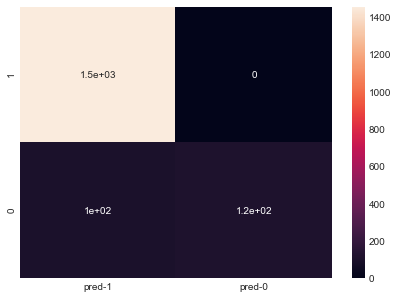

In [37]:
cm = confusion_matrix(y_test,y_pred,labels=['ham','spam'])
cm_df = pd.DataFrame(cm, index = [i for i in ['1','0']], columns = [i for i in ['pred-1','pred-0']])
plt.figure(figsize = (7,5))
sns.heatmap(cm_df,annot=True)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred,labels=['ham','spam']))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.97      1454
        spam       1.00      0.53      0.69       218

    accuracy                           0.94      1672
   macro avg       0.97      0.76      0.83      1672
weighted avg       0.94      0.94      0.93      1672

